## DAV 5400 Project 2 (M9)
Working with HTML, JSON, Web Scraping, and Web APIs

# Part I: Working with HTML and JSON

In [78]:
# load pandas
import pandas as pd

## 1. HTML

In [86]:
# read an HTML file
books1 = pd.read_html('https://raw.githubusercontent.com/675874815/DAV-5401/master/books.html')

In [87]:
# the first item is a data frame
books1[0]

,Title,Authors,Words,Publication Time
0,Gone with the Wind,Margaret Mitchell,800000,1930
1,Dream of the Red Chamber,"Xueqin Cao, Anonymous",960000,1791
2,War and Peace,Lev Nikolaevich Tolstoy,1094000,1869


## 2. JSON

In [88]:
# convert properly formatted JSON data into a Pandas dataframe
books2 = pd.read_json('https://raw.githubusercontent.com/675874815/DAV-5401/master/books.json')
books2

,Title,Authors,Words,Publication Time
0,Gone with the Wind,Margaret Mitchell,800000,1930
1,Dream of the Red Chamber,"[Xueqin Cao, Anonymous]",960000,1791
2,War and Peace,Lev Nikolaevich Tolstoy,1094000,1869


# Part II (40 points): Scraping the Katz School’s AI Faculty Web Page

In [45]:
# Import the necessary libraries
import requests 
from bs4 import BeautifulSoup
import pandas

In [46]:
# Download the web page
page = requests.get("https://www.yu.edu/katz/programs/graduate/artificial-intelligence/faculty")
# Create a BeautifulSoup class to parse the page
soup = BeautifulSoup(page.content, 'html.parser')
# Find the div with class main_content, and assign to faulty
faulty = soup.find(class_="main-content")

In [47]:
# Inside faulty, find each individual faulty item.
faulty_items = faulty.find_all(class_="body")

In [48]:
# Select all items within h5 tags in faulty.
nt_tags = faulty.select("h5")
nt = [n.get_text() for n in nt_tags]
nt

['Paul Russo, Ph.D. Vice Provost and Dean',
 'Andy Catlin, Program Director, Data Analytics and Visualization',
 'Wonjun Lee, Assistant Professor, Artificial Intelligence',
 'Sergey Fogelson, Instructor',
 'Lawrence Fulton, Instructor',
 'Jeff Nieman, Instructor']

In [49]:
# create 2 empty lists
name = [] 
title = []
# use a for loop to add relative items in each list 
for e in nt: 
    name.append(e.split(',',1)[0])
    title.append(e.split(',',1)[1]) 

In [50]:
# show the name list
names

['Paul Russo',
 'Andy Catlin',
 'Wonjun Lee',
 'Sergey Fogelson',
 'Lawrence Fulton',
 'Jeff Nieman']

In [51]:
# show the title list
title

[' Ph.D. Vice Provost and Dean',
 ' Program Director, Data Analytics and Visualization',
 ' Assistant Professor, Artificial Intelligence',
 ' Instructor',
 ' Instructor',
 ' Instructor']

In [52]:
# Select all items within p tags in faulty.
bt = [b.get_text() for b in faulty.select("p")]
bt

['Recent research examines computational methods in social networks and mobile applications by developing and empirically evaluating causal models. Studies focus on social sharing in online communities that are influenced by user motivations, trust, and network properties. This computational social science on the web promises to improve AI algorithms on platforms like Facebook, Instagram, Google Maps, and Tinder. In earlier projects, such as those at Texas Instruments, used Pattern Analysis and Machine Intelligence methods—e.g., clustering and Horn&Schunk algorithm—for image and streaming video analysis for machine vision and tracking moving objects. Other projects have bridged engineering and physics methods to build data collection systems that identify particles emitted as deep space materials degrade. Ethnographic studies in the use of technology in distributed science collaborations. Active peer reviewer. Co-PI for a $15M award to create the CUNY Center for Big Data.',
 'Teaches g

In [57]:
# show the bio list
bio = bt[::2]
bio

['Recent research examines computational methods in social networks and mobile applications by developing and empirically evaluating causal models. Studies focus on social sharing in online communities that are influenced by user motivations, trust, and network properties. This computational social science on the web promises to improve AI algorithms on platforms like Facebook, Instagram, Google Maps, and Tinder. In earlier projects, such as those at Texas Instruments, used Pattern Analysis and Machine Intelligence methods—e.g., clustering and Horn&Schunk algorithm—for image and streaming video analysis for machine vision and tracking moving objects. Other projects have bridged engineering and physics methods to build data collection systems that identify particles emitted as deep space materials degrade. Ethnographic studies in the use of technology in distributed science collaborations. Active peer reviewer. Co-PI for a $15M award to create the CUNY Center for Big Data.',
 'Data scie

In [66]:
# create an empty list
teaching_background = []
# use a for loop to add relative items
for i in range(1,12,2):
    teaching_background.append(bt[i])

In [67]:
# show the list
teaching_background

['Teaches graduate courses in Social Computing, Digital Media, Information Systems, Technology Entrepreneurship, Organizational Behavior, and thesis supervision.',
 'Teaches graduate\xa0courses in Analytics Programming, Recommendation Systems, Regression Modeling, Network Analysis, Natural Language Processing, and Neural Networks.',
 'Teaches graduate courses in Security Analytics, Neural Network and Deep Learning, Information Security, and System Programming.',
 'Teaches graduate\xa0courses in Computational Statistics, Linear Algebra, and Machine Learning.',
 'Teaches graduate courses in Data Analytics, Machine Learning, and Structured Data Management.',
 'Teaches graduate courses in Predictive Modeling, Mathematics, Statistics, Machine Learning, and Project Management.']

In [69]:
import pandas as pd
# combine our data into a Pandas Dataframe
faulty_info = pd.DataFrame({
    "name": name,
    "title": title,
    "bio": bio,
    "teaching background":teaching_background
})
# show the dataframe
faulty_info

,name,title,bio,teaching background
0,Paul Russo,Ph.D. Vice Provost and Dean,Recent research examines computational methods...,"Teaches graduate courses in Social Computing, ..."
1,Andy Catlin,"Program Director, Data Analytics and Visualiz...",Data scientist and data system developer with ...,Teaches graduate courses in Analytics Programm...
2,Wonjun Lee,"Assistant Professor, Artificial Intelligence",Recent research focuses on designing AI-based ...,Teaches graduate courses in Security Analytics...
3,Sergey Fogelson,Instructor,Data scientist and data product architect with...,Teaches graduate courses in Computational Stat...
4,Lawrence Fulton,Instructor,Health data scientist with expertise in machin...,"Teaches graduate courses in Data Analytics, Ma..."
5,Jeff Nieman,Instructor,Data scientist and project manager with expert...,Teaches graduate courses in Predictive Modelin...


# Part III: Working with Web API’s

In [1]:
import requests
# download the web page
res = requests.get('https://api.nytimes.com/svc/movies/v2/reviews/search.json?query=godfather&api-key=9kmNtGQaU51RJ363bQWoJMayZwjSom2V');
res

<Response [200]>

In [2]:
# now convert the 'res' object's JSON content into a dict of 
# native Python objects
data = res.json()
type(data)

dict

In [3]:
# how many items are in the dict object?
len(data)

5

In [4]:
# check the content of the dict
data

{'status': 'OK',
 'copyright': 'Copyright (c) 2021 The New York Times Company. All Rights Reserved.',
 'has_more': False,
 'num_results': 10,
 'results': [{'display_title': 'The Black Godfather',
   'mpaa_rating': 'TV-MA',
   'critics_pick': 0,
   'byline': 'BEN KENIGSBERG',
   'headline': '‘The Black Godfather’ Review: The Music Executive Who Made It All Happen',
   'summary_short': 'Reginald Hudlin’s documentary about Clarence Avant includes many golden anecdotes.',
   'publication_date': '2019-06-06',
   'opening_date': '2019-06-07',
   'date_updated': '2019-06-14 16:44:01',
   'link': {'type': 'article',
    'url': 'https://www.nytimes.com/2019/06/06/movies/the-black-godfather-review.html',
    'suggested_link_text': 'Read the New York Times Review of The Black Godfather'},
   'multimedia': {'type': 'mediumThreeByTwo210',
    'src': 'https://static01.nyt.com/images/2019/06/05/arts/blackgodfather1/blackgodfather1-mediumThreeByTwo210.jpg',
    'height': 140,
    'width': 210}},
  {'d

In [5]:
# view the content of the results object
data['results']

[{'display_title': 'The Black Godfather',
  'mpaa_rating': 'TV-MA',
  'critics_pick': 0,
  'byline': 'BEN KENIGSBERG',
  'headline': '‘The Black Godfather’ Review: The Music Executive Who Made It All Happen',
  'summary_short': 'Reginald Hudlin’s documentary about Clarence Avant includes many golden anecdotes.',
  'publication_date': '2019-06-06',
  'opening_date': '2019-06-07',
  'date_updated': '2019-06-14 16:44:01',
  'link': {'type': 'article',
   'url': 'https://www.nytimes.com/2019/06/06/movies/the-black-godfather-review.html',
   'suggested_link_text': 'Read the New York Times Review of The Black Godfather'},
  'multimedia': {'type': 'mediumThreeByTwo210',
   'src': 'https://static01.nyt.com/images/2019/06/05/arts/blackgodfather1/blackgodfather1-mediumThreeByTwo210.jpg',
   'height': 140,
   'width': 210}},
 {'display_title': 'Square Grouper: The Godfathers of Ganja',
  'mpaa_rating': 'R',
  'critics_pick': 0,
  'byline': 'RACHEL SALTZ',
  'headline': 'Adventures in the Drug Tra

In [6]:
# show the type of the results object
type(data['results'])

list

In [7]:
# how many items are in the list object?
len(data['results'])

10

In [8]:
import pandas as pd

In [9]:
# now convert some of the extracted JSON data into a data frame
issues = pd.DataFrame(data['results'])
issues

,display_title,mpaa_rating,critics_pick,byline,headline,summary_short,publication_date,opening_date,date_updated,link,multimedia
0,The Black Godfather,TV-MA,0,BEN KENIGSBERG,‘The Black Godfather’ Review: The Music Execut...,Reginald Hudlin’s documentary about Clarence A...,2019-06-06,2019-06-07,2019-06-14 16:44:01,"{'type': 'article', 'url': 'https://www.nytime...","{'type': 'mediumThreeByTwo210', 'src': 'https:..."
1,Square Grouper: The Godfathers of Ganja,R,0,RACHEL SALTZ,Adventures in the Drug Trades,“Square Grouper” is a documentary about pot sm...,2011-04-14,2011-04-15,2017-11-02 04:18:13,"{'type': 'article', 'url': 'https://www.nytime...",None
2,Tokyo Godfathers,PG-13,1,A. O. Scott,Three Down-and-Outs Rescue a Foundling From th...,"Another marvel from Satoshi Kon, whose first t...",2004-01-16,None,2017-11-02 04:16:23,"{'type': 'article', 'url': 'https://www.nytime...",None
3,"The Godfather, Part III",R,1,Janet Maslin,GODFATHER PART III (MOVIE),Mafia heir trapped by legacy of past. Coppola'...,1990-12-25,1990-12-25,2017-11-02 04:17:42,"{'type': 'article', 'url': 'https://www.nytime...",None
4,"The Godfather, Part II",R,1,VINCENT CANBY,"Godfather: Part II, The (Movie)",,1974-12-13,1974-12-20,2017-11-02 04:17:27,"{'type': 'article', 'url': 'https://www.nytime...",None
5,The Black Godfather,R,0,NORA SAYRE,"Black Godfather, The (Movie)",,1974-09-04,None,2017-11-02 04:16:03,"{'type': 'article', 'url': 'https://www.nytime...",None
6,The Godfather,R,1,Vincent Canby,THE GODFATHER (MOVIE),Puzo's Mafioso novel. Scalding and memorable.,1972-03-16,1972-03-24,2017-11-02 04:17:26,"{'type': 'article', 'url': 'https://www.nytime...",None
7,Three Godfathers,Passed,0,BOSLEY CROWTHER,Three Godfathers,"Outlaw trio and abandoned child. Typical, expe...",1949-03-04,1948-12-01,2017-11-02 04:17:11,"{'type': 'article', 'url': 'https://www.nytime...",None
8,Miracle in the Sand,Passed,0,J.T.M.,"Three Godfathers, The",Thieves reluctantly care for orphan. Tragic ho...,1936-03-09,1936-03-06,2017-11-02 04:16:58,"{'type': 'article', 'url': 'https://www.nytime...",None
9,El Compadre Mendoza,,0,Harry T. Smith,"Compadre Mendoza, El",Landowner survives Mexican Revolution by suppo...,1934-11-19,1934-11-18,2017-11-02 04:16:55,"{'type': 'article', 'url': 'https://www.nytime...",None


## Data Summary
There are 11 attributes in this dataset:

1. display_title;

2. mpaa_rating;

3. critics_pick;

4. byline;

5. headline;

6. summary_short;

7. publication_date;

8. opening_date;

9. date_updated;

10. link;

11. multimedia.

The specific type of each data is below:

In [10]:
print(issues.dtypes)

display_title       object
mpaa_rating         object
critics_pick         int64
byline              object
headline            object
summary_short       object
publication_date    object
opening_date        object
date_updated        object
link                object
multimedia          object
dtype: object


As we can see, the data types of critics_pick is int64, the data types of others are object.

## Exploratory Data Analysis (EDA)

Summary statistics for each attribute and appropriate graphical analysis for some attributes using Seaborn.

In [12]:
# get descriptive stats for display_title
issues['display_title'].describe()

count                      10
unique                      9
top       The Black Godfather
freq                        2
Name: display_title, dtype: object

### Preliminary Data Analysis - mpaa_rating

Here we examine the distribution of mpaa_rating.

In [13]:
# get descriptive stats for mpaa_rating
issues['mpaa_rating'].describe()

count     10
unique     5
top        R
freq       5
Name: mpaa_rating, dtype: object

In [19]:
# load seaborn
import seaborn as sns

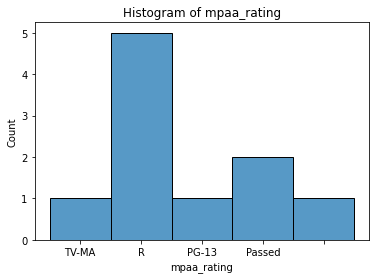

In [20]:
# define the type of plot you want to appear
sns.histplot(issues['mpaa_rating'])
# give the plot a title
plt.title('Histogram of mpaa_rating')
# show the histogram
plt.show();

The above histogram and descriptive statistics show that the overall distribution of mpaa_rating. They tell us that the most common mpaa_rating in this data set is "R", which is 5.

### Preliminary Data Analysis - critics_pick

Here we examine the distribution of critics_pick.

In [15]:
# convert the column to string
issues["critics_pick"] = issues["critics_pick"].astype(str)

In [16]:
# get descriptive stats for critics_pick
issues['critics_pick'].describe()

count     10
unique     2
top        0
freq       6
Name: critics_pick, dtype: object

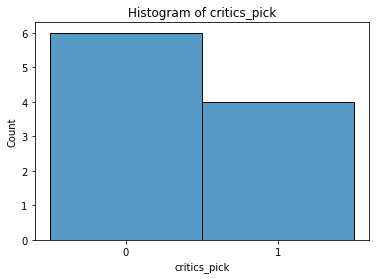

In [21]:
# define the type of plot you want to appear
sns.histplot(issues['critics_pick'])
# give the plot a title
plt.title('Histogram of critics_pick')
# show the histogram
plt.show();

The above histogram and descriptive statistics show that the overall distribution of critics_pick. They tell us that the most common critics_pick in this data set is "0", which is 6.

In [18]:
# get descriptive stats for byline
issues['byline'].describe()

count                 10
unique                10
top       Harry T. Smith
freq                   1
Name: byline, dtype: object

In [47]:
# get descriptive stats for headline
issues['headline'].describe()

count                        10
unique                       10
top       Three Godfathers, The
freq                          1
Name: headline, dtype: object

In [48]:
# get descriptive stats for summary_short
issues['summary_short'].describe()

count     10
unique     9
top         
freq       2
Name: summary_short, dtype: object

In [49]:
# get descriptive stats for publication_date
issues['publication_date'].describe()

count             10
unique            10
top       1936-03-09
freq               1
Name: publication_date, dtype: object

In [50]:
# get descriptive stats for opening_date
issues['opening_date'].describe()

count              8
unique             8
top       1936-03-06
freq               1
Name: opening_date, dtype: object

In [51]:
# get descriptive stats for date_updated
issues['date_updated'].describe()

count                      10
unique                     10
top       2017-11-02 04:17:42
freq                        1
Name: date_updated, dtype: object

In [52]:
# get descriptive stats for link
issues['link'].describe()

count                                                    10
unique                                                   10
top       {'type': 'article', 'url': 'https://www.nytime...
freq                                                      1
Name: link, dtype: object

In [53]:
# get descriptive stats for multmedia
issues['multimedia'].describe()

count                                                     1
unique                                                    1
top       {'type': 'mediumThreeByTwo210', 'src': 'https:...
freq                                                      1
Name: multimedia, dtype: object